# Test 1: Frequency "step"

Many improvements to the frequency detection system are possible, and some of them may involve extending the window of signal samples used to calculate the frequency estimate. As such, it will be useful to keep track of how fast our algorithm can track changes in frequency. The simplest way to test for this is to generate simulated signals consisting of two sinusoids with different frequency back-to-back, and comparing the output to the true frequency content used for signal generation.

Create a python program which generates a test signal as described above, and feeds it into the attached function `freq_detection`. Subsequently, your program should provide an analysis of the outuput from the function `freq_detection`, which can take the form of a plot showing the frequency detection system's response time to changes in frequency. This will be useful when evaluating the frequency detection system's adherence to the the following design parameter: *"The algorithm must be able to adapt to changes in fundamental frequency within $0.5$ seconds, with samples more than $0.5$ seconds old having negligible influence."*

In [ ]:
#https://stackoverflow.com/questions/2648151/python-frequency-detection
#https://gist.github.com/Sivlemx/f83a34fd9020209ab7fc86d4e88bcda7

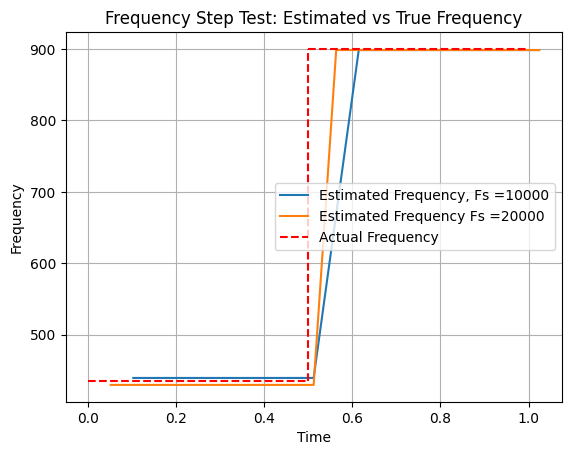

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from baseline_algorithm import freq_detection  # Assuming this function is defined

fs = 10000  # Samples per second
f1 = 435  # First frequency in Hz
f2 = 900  # Second frequency in Hz (example)
A = 1  # Amplitude in Volts
noise_var = 0.02  # Reduced Noise variance (V^2)

N1 = 1024
N2 = 2048


#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0, *, device=None)
#Have to add a higher amount of sampes to get better resolution
tn1 = np.linspace(0, 0.5, int(fs * 0.5), endpoint=False) 
tn2 = np.linspace(0.5, 1, int(fs * 0.5), endpoint=False)
tTot1 = np.concatenate((tn1, tn2))  

tn3 = np.linspace(0, 0.5, int(fs * 0.5)*2, endpoint=False) 
tn4 = np.linspace(0.5, 1, int(fs * 0.5)*2, endpoint=False)

signalNr1 = A * np.sin(2 * np.pi * f1 * tn1) 
signalNr2 = A * np.sin(2 * np.pi * f2 * tn2) 

signalNr3 = A * np.sin(2 * np.pi * f1 * tn3) 
signalNr4 = A * np.sin(2 * np.pi * f2 * tn4) 

testSignal1 = np.concatenate((signalNr1, signalNr2))
testSignal2 = np.concatenate((signalNr3, signalNr4))

NTot1 = len(testSignal1) 
NTot2 = len(testSignal2)


noise1 = np.random.normal(scale=np.sqrt(noise_var), size=NTot1)
noise2 = np.random.normal(scale=np.sqrt(noise_var), size=NTot2)  

xn1 = testSignal1 + noise1

xn2 = testSignal2 + noise2 

tEst1, fEst1 = freq_detection(xn1, fs)  
tEst2, fEst2 = freq_detection(xn2, fs*2)  


plt.figure()
plt.plot(tEst1, fEst1, label=f"Estimated Frequency, Fs ={fs}")
plt.plot(tEst2, fEst2, label=f"Estimated Frequency, Fs ={fs*2}")




plt.plot([0, tTot1[len(tn1) - 1]], [f1, f1], 'r--', label="Actual Frequency ") 
plt.plot([tTot1[len(tn1)], tTot1[-1]], [f2, f2], 'r--')# 'r--', label="Actual Frequency") 
plt.vlines(x = 0.5, ymin = f1, ymax = f2,
           colors='r', linestyles ="dashed")
       #    label = 'vline_multiple - full height')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Frequency Step Test: Estimated vs True Frequency')
plt.legend()
plt.grid(True)


plt.show()


[Here](Figures/FreqStepTest_LF.png) is an image showing a *suggestion* for what your test output may look like when simulating a single frequency step, using two different window lengths as basis for analysis in the frequency detection algorithm.